<a href="https://colab.research.google.com/github/uzmagull/Fake-News-Detection-NLP-BiLSTM/blob/main/Real_fake_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries Import**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


**Data Manipulation**

In [8]:
df = pd.read_csv("/fake_or_real_news.csv")
df.head()
df.info()
df['label'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


,count
label,
REAL,3171
FAKE,3164


In [4]:
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


**Data Preprocessing**

In [9]:
df = df[['text', 'label']]   # sirf required columns
df.dropna(inplace=True)     # missing values remove


**Label Encoding**
*FAKE = 0*
*REAL = 1*

In [10]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

df.head()


,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


# **Train Test Split**

In [11]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Tokenization

In [12]:
vocab_size = 20000
max_length = 300
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Padding

In [13]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')


**Deep Learning Model (LSTM)**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input

model = Sequential()

model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=vocab_size, output_dim=128))

model.add(Bidirectional(
    LSTM(128)
))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 300, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,823,425 (10.77 MB)

 Trainable params: 2,823,425 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

# Model **Training**

In [23]:
history = model.fit(
    X_train_pad,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 64s 951ms/step - accuracy: 0.6515 - loss: 0.6231 - val_accuracy: 0.7663 - val_loss: 0.5225
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 60s 943ms/step - accuracy: 0.8851 - loss: 0.3405 - val_accuracy: 0.8886 - val_loss: 0.2799
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 945ms/step - accuracy: 0.9732 - loss: 0.1034 - val_accuracy: 0.9004 - val_loss: 0.2392
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 927ms/step - accuracy: 0.9955 - loss: 0.0291 - val_accuracy: 0.8964 - val_loss: 0.2631
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 952ms/step - accuracy: 0.9989 - loss: 0.0093 - val_accuracy: 0.8895 - val_loss: 0.3172


**Training Graph**

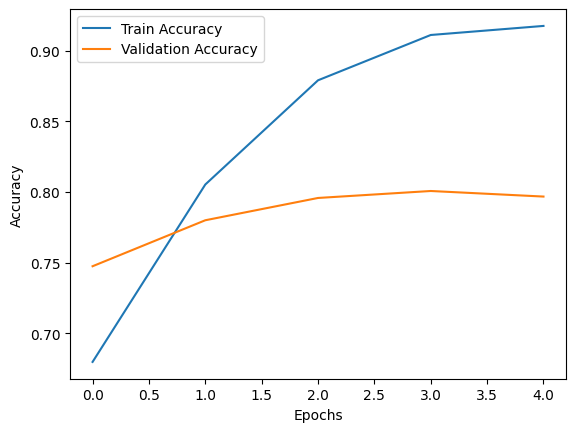

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


## **Model Evaluation**

In [25]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step
Accuracy: 0.8879242304656669
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       628
           1       0.93      0.84      0.88       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



# **Confusion Matrix**

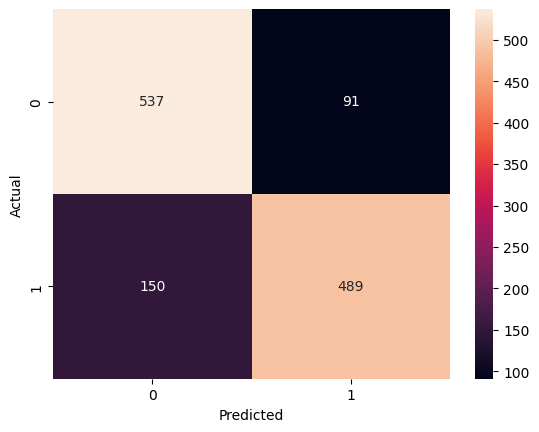

In [20]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Test with Custom News

In [21]:
def predict_news(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(pad)[0][0]
    return "REAL NEWS 🟢" if pred > 0.5 else "FAKE NEWS 🔴"

predict_news("Government announces new education policy for universities")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'FAKE NEWS 🔴'